<a href="https://colab.research.google.com/github/Douglas-Wilian/Topicos-em-IA/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NAIVE BAYES - WINE DATASET

Docente: José Alfredo
Discente: Douglas Wilian Lima Silva

In [19]:
#BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Carregamento da base de dados e criação do dataframe
wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
#Separação das classes de treinamento e testes conforme realizado nos estudos anteriores
indices = np.random.permutation(data.shape[0])
div = int(0.4*len(indices)) #40% para treinamento e 60% para testes
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = data.loc[desen_id,:], data.loc[test_id,:]

xd = cj_desen.drop('target', axis =1)
yd = cj_desen.target

xt = cj_test.drop('target', axis=1)
yt = cj_test.target


display(xd.head())
display(yd.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0


15     0
28     0
136    2
23     0
13     0
Name: target, dtype: int64

In [22]:
nb = GaussianNB()

nb.fit(xd, yd) #Treinamento do modelo

pred = nb.predict(xt) #Resultados previstos

acuracia = accuracy_score(yt, pred)*100
cm = confusion_matrix(yt, pred)


In [23]:
print(f'A acurácia do teste foi {acuracia:.4f}%')

A acurácia do teste foi 96.2617%


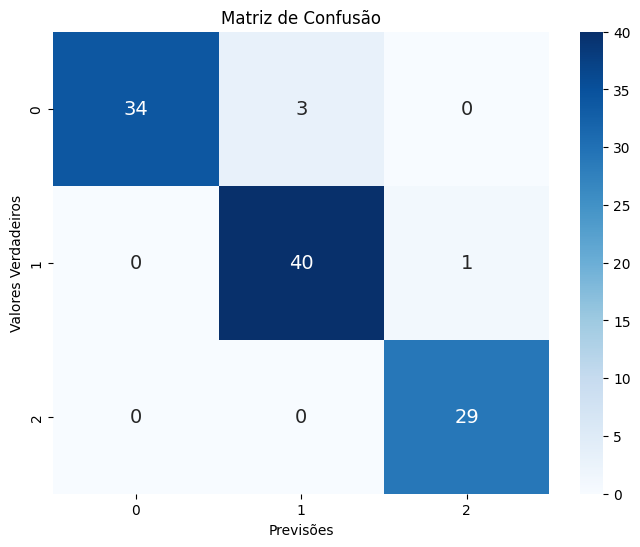

In [24]:
#Matriz de confusão, seguindo os padrões já desenvolvidos

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()